# Marketing Mix Modeling

Under kursen har vi fokuserat mycket på att försöka tracka vilka marknadsföringskampanjer som driver besökare till en webbsida eller butik, och använt attributionsmodeller för att bedöma vilka kampanjer som skall anses ha bidragit till eventuella konverteringar. Även om knep som UTM-taggar, promokoder, och kampanj-URLer i många fall kan ge oss information om vilken eller vilka kampanjer som varit inblandade i köpprocessen så är det långt ifrån alltid som vi har den informationen. Detta gäller särskilt när vi använder oss av offline marknadsföring i t.ex. TV, radio, och tidningar.

Ett alternativt sätt att mäta marknadsföringskampanjernas påverkar på försäljningen är att använda sig av Marketing Mix Modeling (MMM). Där försöker man inte följa enskilda användare och se varifrån de kommer utan man försöker direkt modellera sambandet mellan pengar som spenderas i en viss kanal och försäljningen. Här nöjer vi oss med en enkel introduktion till hur MMM fungerar och tittar enbart på det direkta sambandet mellan en kampanj och den aktuella försäljningen. Normalt är sambandet mer komplext och inom MMM använder man ofta begreppet adstock (https://en.wikipedia.org/wiki/Advertising_adstock) som beskriver hur lång tid efter en marknadsföringsinsats som denna fortfarande har effekt. Man bör också titta på andra faktorer som påverkar försäljningen, som t.ex. säsongsvariationer, prissättning, och även konkurrensläget. 

För att avgöra hur mycket olika faktorer påverkar försäljningen kan man använda sig av linjär regression. Under statistik-kursen har ni tittat på hur man kan göra en linjär regression med en variabel. Här behöver vi dock titta på flera variabler samtidigt och då blir det snabbt jobbigt att lösa med papper och penna så här kommer vi att använda oss av Python-biblioteket statsmodels och dess metod för Ordinary Least Squares (OLS): https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

## Exempel 1

Låt oss börja med ett väldigt enkelt exempel där vi själva skapar upp data för våra annonsinsatser och tar fram en fiktiv försäljningsdata som har ett linjärt beroende av annonserna.

Först importerar vi de bibliotek som vi kommer att behöva:

In [0]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

Vi skapar nu upp en dataframe med ett tidsintervall på ett år:

In [0]:
all_days = pd.date_range('2018-01-01', '2019-01-01', freq='D')
df = pd.DataFrame(all_days, columns = ['date'])
df.head()

,date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05


In [0]:
Sedan lägger vi till slumpade siffror för annons-spedering för två stycken annonser *ad1* och *ad2* och lägger dessa i vår dataframe:

In [0]:
df['ad1'] = np.random.randint(0, 50, df.shape[0])
df['ad2'] = np.random.randint(0, 50, df.shape[0])
df.head()

,date,ad1,ad2
0,2018-01-01,20,22
1,2018-01-02,15,10
2,2018-01-03,36,41
3,2018-01-04,5,28
4,2018-01-05,3,12


Slutligen tar vi fram våra fiktiva försäljningssiffror. Notera att vi satt en basförsäljning på 50 och att vi sedan lägger till ett linjärt samband mellan de pengar som är spenderats på respektive kampanj och våra försäljningssiffror. Vi lägger dessutom på en viss slumpmässig försäljning.

In [0]:
df['sales'] = 50 + df.ad1 * 0.1 + df.ad2 * 0.2 + np.random.uniform(0, 1)
df.head()

,date,ad1,ad2,sales
0,2018-01-01,20,22,56.650966
1,2018-01-02,15,10,53.750966
2,2018-01-03,36,41,62.050966
3,2018-01-04,5,28,56.350966
4,2018-01-05,3,12,52.950966


För att visualisera det hela kan vi plotta försäljningen och respektive annonsutgifter:

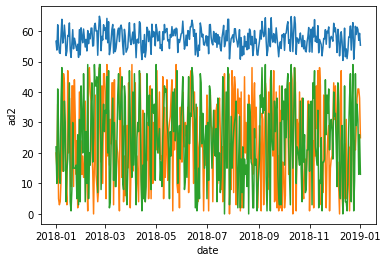

In [0]:
sns.lineplot(x='date', y='sales', data=df);
sns.lineplot(x='date', y='ad1', data=df);
sns.lineplot(x='date', y='ad2', data=df);

Låt oss kolla så att vi verkligen har ett beroende mellan våra annonsutgifter och vår försäljning:

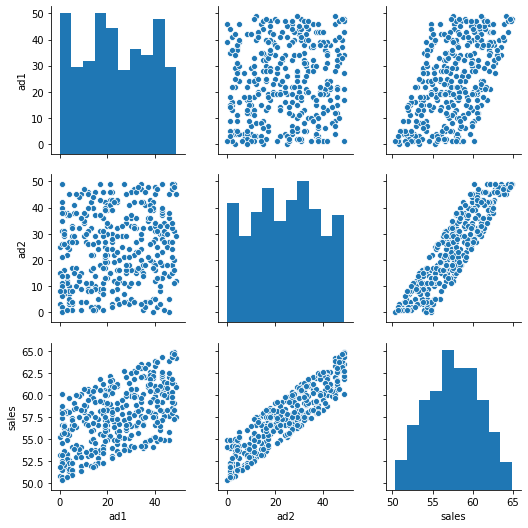

In [0]:
sns.pairplot(df);

Ett alternativt sätt att kolla detta är att använda en heatmap som visar korrelationen:

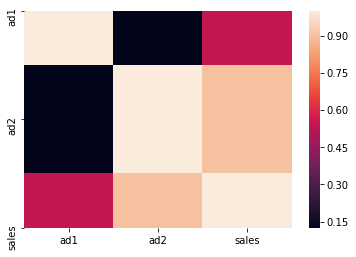

In [0]:
corr = df.corr()
sns.heatmap(corr);

I båda fallen ser det ut som att vi har en korrelation mellan hur mycket vi spenderar på annonserna och hur mycket vi säljer. Det ser ut att vara en starkare korrelation mellan ad2 och försäljningen än mellan ad1 och försäljningen, vilket stämmer bra med hur vi hur vi beräknat våra fiktiva försäljningssiffror.

Låt oss nu använda OLS för att se om vi med linjär regression kan hitta koefficienterna för sambanden mellan våra annonsutgifter och intäkterna:

In [0]:
X = df[['ad1', 'ad2']] 
y = df['sales']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.781e+30
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:47:44   Log-Likelihood:                 11109.
No. Observations:                 366   AIC:                        -2.221e+04
Df Residuals:                     363   BIC:                        -2.220e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2510   2.08e-15   2.42e+16      0.000      50.251      50.251
ad1            0.1000   5.84e-17   1.71e+15      0.000       0.100       0.100
ad2            0.2000   6.03e-17   3.32e+15      0.000       0.200       0.200
==============================================================================
Omnibus:                        6.583   Durbin-Watson:                   0.478
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.320
Skew:                          -0.096   Prob(JB):                        0.115
Kurtosis:                       2.503   Cond. No.                         92.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vi får en hel del information från körningen, men det met mest intressanta är att kolla på koefficienterna. Vi kan se att dessa är korrekt estimerade utifrån hur vi tog fram våra försäljningssiffror. Om vi ökar annonseringen med ad1 med beloppet 1 så kommer vår försäljing att öka med 0.1, och ökar vi ad2 med 1 så ökar försäljningen med 0.2.

## Exempel 2

Låt oss titta på ett annat dataset där vi inte själva har tagit fram försäljningssiffrorna. Detta dataset hittade jag på Kaggle (https://www.kaggle.com/imdineshgrewal/market-mix-modeling-using-sales-data/) och har lagt upp det på Github för lättare åtkomst. Vi läser in detta och tar en snabb titt på innehållet:

In [0]:
df2 = pd.read_csv('https://raw.githubusercontent.com/hornstein/multichannel-analytics/master/data/Advertising.csv', index_col=0)
df2.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


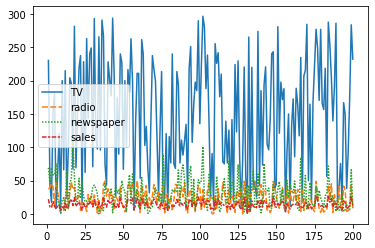

In [0]:
sns.lineplot(data=df2);

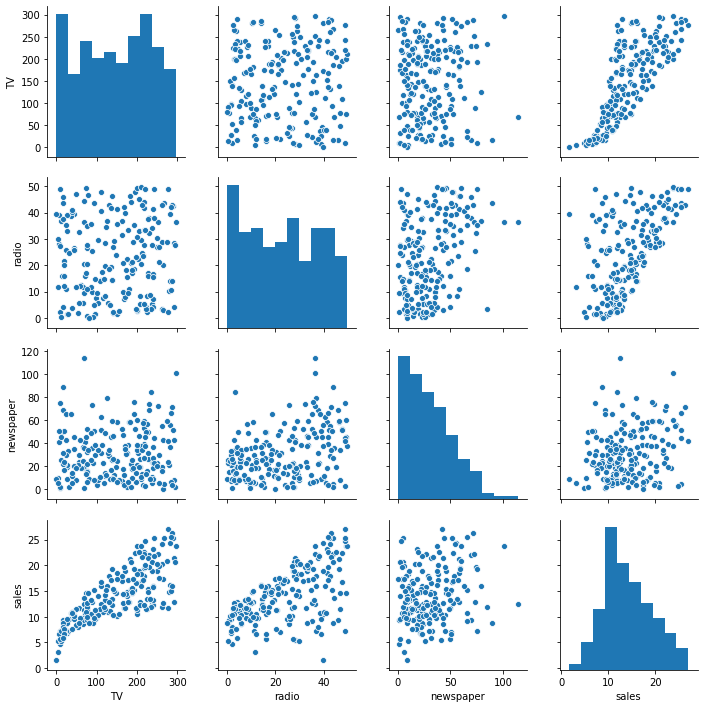

In [0]:
sns.pairplot(df2);

Vi kan se att se att det åtminstone verkar finnas ett samband mellan TV och sales, samt mellan radio och sales, medan det verkar mer tveksamt om det finns ett samband mellan newspaper och sales. Låt oss testa detta genom att göra en Marketing Mix Model:

In [0]:
X = df2[['TV', 'radio', 'newspaper']] 
y = df2['sales']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        22:47:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Precis som vi misstänkte finns det i princip inget samband mellan newspaper och sales, och kan därför ta bart denna från modellen utan att det påverkar resultatet, samtidigt som vi får en enklare modell vilket vi alltid bör sträva efter:

In [0]:
X = df2[['TV', 'radio']] 
y = df2['sales']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           4.83e-98
Time:                        22:47:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exempel 3

Låt oss slutligen titta på hur vi skulle kunna använda samma teknik på inlämningsuppgift 2 för att hitta samband mellan våra olika parametrar och försäljningen. För att inte lösa alltför mycket av uppgiften åt er så har jag begränsat mig till att undersöka om onpromotion har någon påverkan på försäljningen, samt ett par säsongsberoende parametrar.

För att förenkla arbetet lite har jag gjort om SQL-scriptet som läser ut data från BigQuery så att jag istället får försäljningar med respektive utan onpromotion på samma rad istället för på olika rader:

```
SELECT 
  date,
  SUM(CASE WHEN onpromotion = "True" THEN transactions ELSE 0 END) AS onpromo_transactions, 
  SUM(CASE WHEN onpromotion = "False" THEN transactions ELSE 0 END) AS nopromo_transactions,
  SUM(CASE WHEN onpromotion = "True" THEN total_unit_sales ELSE 0 END) AS onpromo_total_unit_sales, 
  SUM(CASE WHEN onpromotion = "False" THEN total_unit_sales ELSE 0 END) AS nopromo_total_unit_sales
FROM `surfsapp-8011b.se_bluebottle_surfsapp_ANDROID.unit_sales_with_promotion`
GROUP BY date
ORDER BY date
```
Resultatet har jag sedan lagt som en csv-fil på Github för att slippa köra om scriptet då den söker genom en stor datamängd. Låt oss därför börja med att läsa in csv-filen:


In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/hornstein/multichannel-analytics/master/data/lab2_unit_transactions.csv')
df3.tail()

,date,onpromo_transactions,nopromo_transactions,onpromo_total_unit_sales,nopromo_total_unit_sales
1594,2017-08-11,0,54,0,561
1595,2017-08-12,0,54,0,606
1596,2017-08-13,0,54,0,650
1597,2017-08-14,0,53,0,535
1598,2017-08-15,0,54,0,568


Jag skapar sedan upp ett antal säsongsbaserade parametrar som jag lägger till i min dataframe:

In [0]:
df3['total_unit_sales'] = df3.onpromo_total_unit_sales + df3.nopromo_total_unit_sales
df3['promo_rate'] = df3.onpromo_total_unit_sales / df3.total_unit_sales
df3['year'] = pd.DatetimeIndex(df3['date']).year
df3['month'] = pd.DatetimeIndex(df3['date']).month_name()
df3['week'] = pd.DatetimeIndex(df3['date']).week
df3['weekday'] = pd.DatetimeIndex(df3['date']).weekday
df3['isnewyear'] = pd.DatetimeIndex(df3['date']).is_year_start.astype(int)

df3.tail()

,date,onpromo_transactions,nopromo_transactions,onpromo_total_unit_sales,nopromo_total_unit_sales,total_unit_sales,promo_rate,year,month,week,weekday,isnewyear
1594,2017-08-11,0,54,0,561,561,0.0,2017,August,32,4,0
1595,2017-08-12,0,54,0,606,606,0.0,2017,August,32,5,0
1596,2017-08-13,0,54,0,650,650,0.0,2017,August,32,6,0
1597,2017-08-14,0,53,0,535,535,0.0,2017,August,33,0,0
1598,2017-08-15,0,54,0,568,568,0.0,2017,August,33,1,0


Här väljer jag också att ta bort alla rader med NaN:

In [0]:
df3 = df3.dropna()

Vi kan nu titta på sambanden mellan våra parametrar och försäljningen:

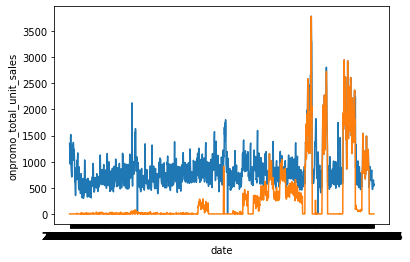

In [0]:
sns.lineplot(x='date', y='total_unit_sales', data=df3);
sns.lineplot(x='date', y='onpromo_total_unit_sales', data=df3);

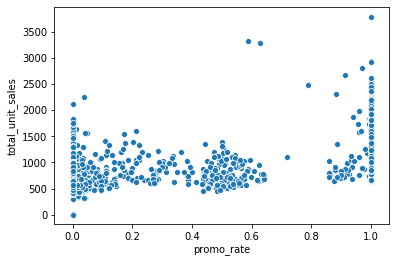

In [0]:
sns.scatterplot(x="promo_rate", y="total_unit_sales", data=df3);

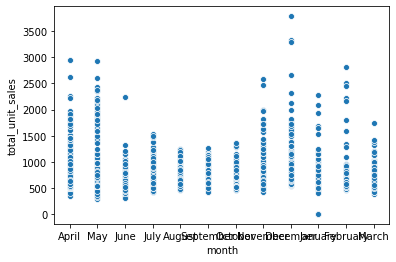

In [0]:
sns.scatterplot(x="month", y="total_unit_sales", data=df3);

Det ser ut att finnas ett linjärt samband mellan andelen butiker som har kampanj på produkten och antalet sålda enheter. Det verkar också finnas något samband mellan månad och försäljning, men den är inte linjär så här har jag istället valt att se månad som en kategorisk variabel och skapar därför upp dummy-variabler för denna:

In [0]:
dummies = pd.get_dummies(df3['month'])
df3 = pd.concat([df3, dummies], axis=1)
df3.sample(5)

,date,onpromo_transactions,nopromo_transactions,onpromo_total_unit_sales,nopromo_total_unit_sales,total_unit_sales,promo_rate,year,month,week,weekday,isnewyear,April,August,December,February,January,July,June,March,May,November,October,September
1534,2017-06-12,2,51,47,548,595,0.078992,2017,June,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0
576,2014-10-25,2,46,34,741,775,0.043871,2014,October,43,5,0,0,0,0,0,0,0,0,0,0,0,1,0
719,2015-03-18,1,48,5,511,516,0.009690,2015,March,12,2,0,0,0,0,0,0,0,0,1,0,0,0,0
636,2014-12-24,3,44,67,1495,1562,0.042894,2014,December,52,2,0,0,0,1,0,0,0,0,0,0,0,0,0
1179,2016-06-21,52,1,742,5,747,0.993307,2016,June,25,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Nu kan vi göra en OLS för att estimera koefficienterna för våra olika variabler. Notera att jag utelämnat en månad nedan (januari). Tar jag med alla månaderna blir problemet överbestämt och vi kan få flera olika lösningar, eller i värsta fall inte konvergera till någon lösning alls. Genom att utelämna januari blir koefficienterna för de övriga månaderna i relation till januaris försäljning:

In [0]:
X = df3[['year','promo_rate','February','March','April','May','June','July','August','September','October','November','December','isnewyear']] 
y = df3['total_unit_sales']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_unit_sales   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     63.06
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          3.29e-133
Time:                        22:48:06   Log-Likelihood:                -8816.2
No. Observations:                1230   AIC:                         1.766e+04
Df Residuals:                    1215   BIC:                         1.774e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.288e+04   2.38e+04     -1.799      0.072   -8.96e+04    3881.876
year          21.6099     11.823      1.828      0.068      -1.586      44.806
promo_rate   632.8527     34.078     18.571      0.000     565.994     699.711
February      47.4533     47.798      0.993      0.321     -46.323     141.230
March         51.7374     46.787      1.106      0.269     -40.055     143.530
April        175.0393     44.535      3.930      0.000      87.665     262.414
May          105.8996     45.116      2.347      0.019      17.386     194.413
June        -152.7830     44.720     -3.416      0.001    -240.520     -65.046
July        -110.4293     44.982     -2.455      0.014    -198.681     -22.178
August       -68.9798     46.174     -1.494      0.135    -159.570      21.610
September    -59.3188     49.100     -1.208      0.227    -155.649      37.012
October      -60.2302     48.231     -1.249      0.212    -154.855      34.395
November     168.0569     48.991      3.430      0.001      71.941     264.173
December     426.6409     48.234      8.845      0.000     332.011     521.271
isnewyear   -683.7368    185.373     -3.688      0.000   -1047.423    -320.051
==============================================================================
Omnibus:                      380.882   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1580.300
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                       7.768   Cond. No.                     5.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Från resultaten ovan kan vi se att den estimerade merförsäljningen om vi kör onpromotion i samtliga butiker blir 632 enheter. Vi kan också se att nyårsdagen har en betydligt lägre estimerad försäljning (kanske stänger många butiker för inventering?). Vi kan också se att december har en betydligt högre estimerad försäljning.

Genom linjär regression skapar vi en modell för den estimerade försäljingen. Denna modell kan faktiskt användas även för att prognostisera framtida försäljning genom att man helt enkelt matar in ett framtida datum, men detta är ett ämne för nästa kurs...